In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [6]:
data=pd.read_csv("/content/Fraud.csv")

In [7]:
df=pd.DataFrame(data)

In [8]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  float64
 10  isFlaggedFraud  179013 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.0+ MB


In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,178874
1.0,139


In [12]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,179013


In [13]:
#to check for null values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,1
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [14]:
df['isFlaggedFraud']

,isFlaggedFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
179009,0.0
179010,0.0
179011,0.0
179012,0.0


In [15]:
#for NaN
df.isnull().sum().sum()

np.int64(8)

In [16]:
#shape of dataset
df.shape

(179014, 11)

In [17]:
#this is the % of isFraud to the original entire dataframe
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.08)

[]

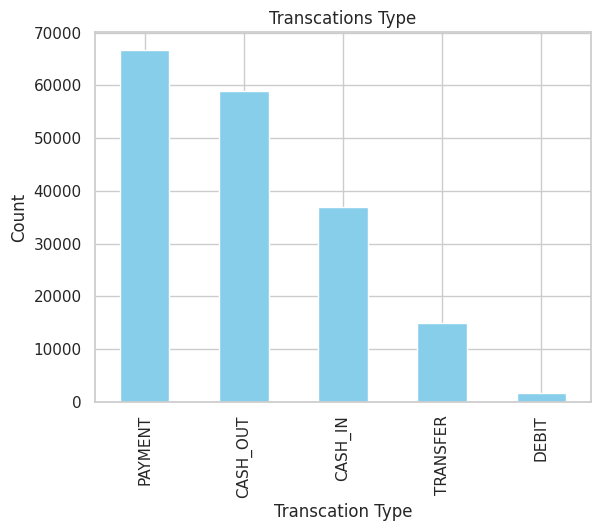

In [18]:
df['type'].value_counts().plot(kind="bar",title="Transcations Type",color="skyblue")
plt.xlabel("Transcation Type")
plt.ylabel("Count")
plt.plot()

In [19]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)

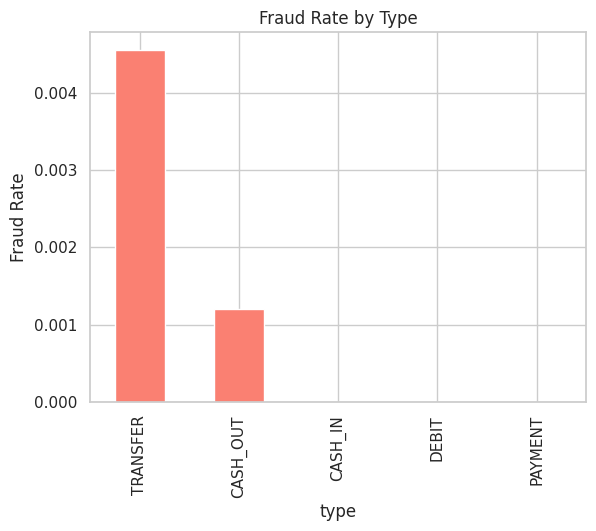

In [20]:
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [21]:
fraud_by_type

,isFraud
type,
TRANSFER,0.004559
CASH_OUT,0.001205
CASH_IN,0.000000
DEBIT,0.000000
PAYMENT,0.000000


In [22]:
df['amount'].describe().astype(int)

,amount
count,179014
mean,180132
std,333582
min,0
25%,11669
50%,65668
75%,226839
max,10000000


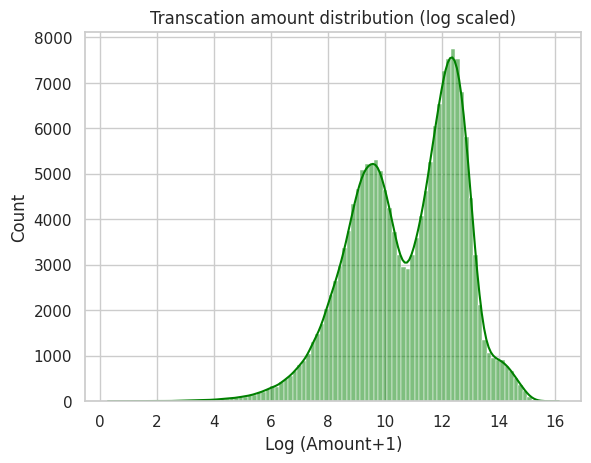

In [23]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color="green")
plt.title("Transcation amount distribution (log scaled)")
plt.xlabel("Log (Amount+1)")
plt.show()

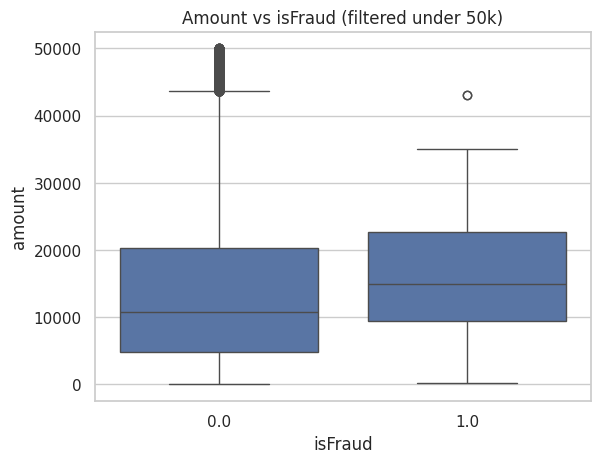

In [24]:
sns.boxplot(data=df[df['amount']<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (filtered under 50k)")
plt.show()

In [25]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [26]:
df['balanceDiffOrig']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDiffDest']=df['newbalanceDest']-df['oldbalanceDest']

In [27]:
(df['balanceDiffOrig']<0).sum()

np.int64(36846)

In [28]:
(df['balanceDiffDest']<0).sum()

np.int64(33425)

In [29]:
df.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0


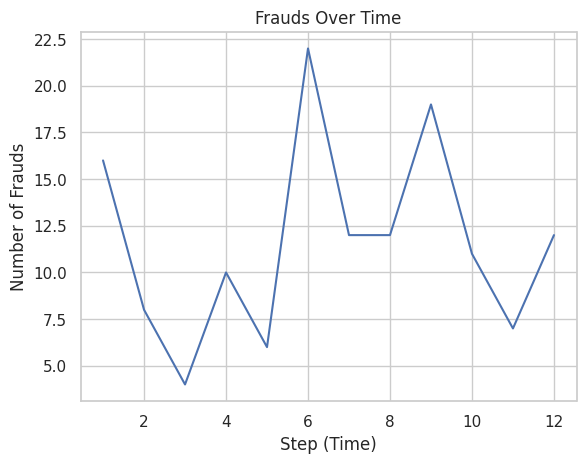

In [30]:
frauds_per_step=df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index,frauds_per_step.values,label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [31]:
df.drop(columns="step",inplace=True)

In [32]:
df.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0


In [33]:
top_senders=df['nameOrig'].value_counts().head(10)

In [34]:
top_senders

,count
nameOrig,
C44568807,2
C260230637,2
C1709295811,2
C2114993439,1
C1637072203,1
C513051811,1
C1422539269,1
C676310066,1
C1571234357,1


In [35]:
top_receivers=df['nameDest'].value_counts().head(10)

In [36]:
top_receivers

,count
nameDest,
C985934102,81
C1286084959,80
C248609774,75
C1590550415,74
C2083562754,74
C977993101,70
C665576141,69
C1360767589,67
C451111351,65


In [37]:
fraud_users=df[df['isFraud']==1]['nameOrig'].value_counts().head(10)

In [38]:
fraud_users

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1
C467632528,1


In [39]:
fraud_types=df[df['type'].isin(['TRANSFER','CASH_OUT'])]

In [40]:
fraud_types['type'].value_counts()

,count
type,
CASH_OUT,58910
TRANSFER,14917


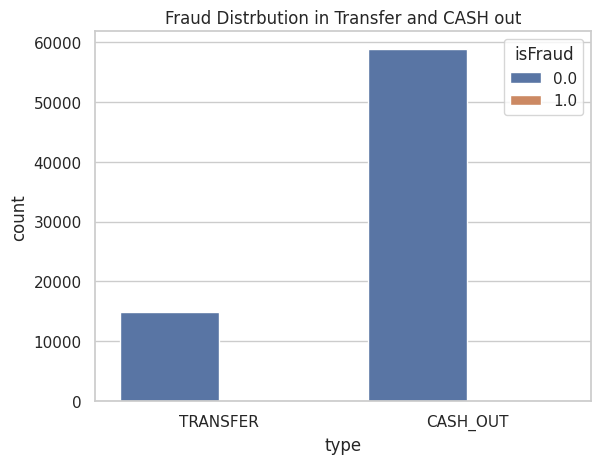

In [41]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distrbution in Transfer and CASH out")
plt.show()

In [42]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [43]:
corr=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

In [44]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.019359,-0.023891,0.223895,0.349275,0.036239
oldbalanceOrg,-0.019359,1.000000,0.998970,0.097961,0.066721,-0.002824
newbalanceOrig,-0.023891,0.998970,1.000000,0.099503,0.065720,-0.008649
oldbalanceDest,0.223895,0.097961,0.099503,1.000000,0.949306,-0.008282
newbalanceDest,0.349275,0.066721,0.065720,0.949306,1.000000,-0.005282
isFraud,0.036239,-0.002824,-0.008649,-0.008282,-0.005282,1.000000


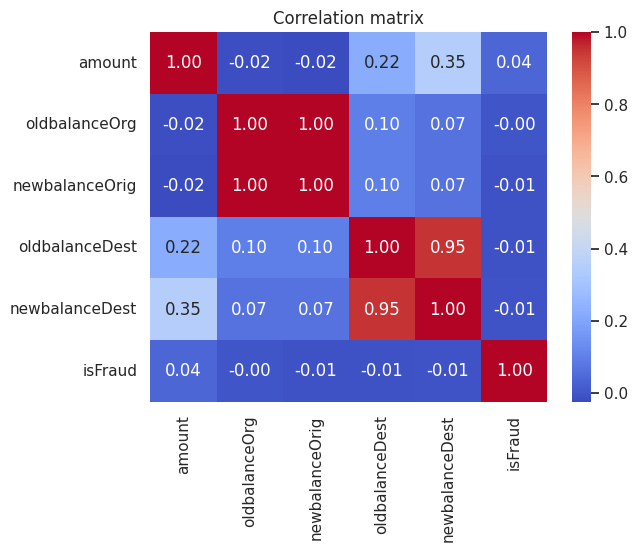

In [45]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation matrix")
plt.show()

In [46]:
#-1 is strong negative relationship
#1 is strong positive relationship
#0 is no strong relationship

In [47]:
zero_after_transfer=df[
    (df['oldbalanceOrg']>0) &
    (df['newbalanceOrig']==0)&
    (df['type'].isin(['TRANSFER','CASH_OUT']))
]

In [48]:
len(zero_after_transfer)

29184

In [49]:
zero_after_transfer.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0,181.0,0.0


In [50]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,178874
1.0,139


In [51]:
#feature selection and preperations
from sklearn.model_selection import train_test_split #splitting the dataset into training and testing set
from sklearn.preprocessing import StandardScaler #for scaling the data
from sklearn.linear_model import LogisticRegression #for modeling
from sklearn.metrics import classification_report,confusion_matrix #for model evaluation
from sklearn.pipeline import Pipeline #for training the model and tranformation operations together
from sklearn.compose import ColumnTransformer #for data transformation
from sklearn.preprocessing import OneHotEncoder

In [52]:
df.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0


In [53]:
df_model=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [54]:
df_model.head(1)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0


In [55]:
#categorical and numerical types
categorical=['type']
numerical=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','balanceDiffOrig','balanceDiffDest']

In [56]:
#to remove the Nan or missing values
df_model.dropna(subset='isFraud',inplace=True)

In [57]:
#the feature
X=df_model.drop('isFraud',axis=1)
#setting the target
y=df_model['isFraud']

In [58]:
#splitting and training the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [59]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numerical),
        ("cat",OneHotEncoder(drop="first",handle_unknown='ignore'),categorical)
    ],
    remainder="drop"
)

In [60]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000)) #set the class weight to balance to handle imbalanced data
]
)

In [61]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [62]:
y_pred=pipeline.predict(X_test)

In [63]:
clf_report=classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     53662
         1.0       0.00      0.95      0.01        42

    accuracy                           0.83     53704
   macro avg       0.50      0.89      0.46     53704
weighted avg       1.00      0.83      0.91     53704



In [64]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[44563  9099]
 [    2    40]]


In [65]:
#for class imbalance we can use SMOTE or Under Sampling techinques or different models

In [66]:
pipeline.score(X_test,y_test)*100

83.05340384328915

ACCURACY SCORE OF LOGISITIC REGRESSION IS 83%


In [67]:
import joblib #to export the pipeline
joblib.dump(pipeline,"model_pipeline.pkl")

['model_pipeline.pkl']

In [68]:
import sklearn
print(sklearn.__version__)

1.6.1


MODEL COMPARISON WITH SVM AND RANDOM FOREST

In [69]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [70]:
svm_pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",SVC(class_weight="balanced"))
])

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_pipeline=Pipeline([
    ("prep",preprocessor),
    ("rf",RandomForestClassifier(class_weight="balanced"))
])

In [72]:
svm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf', SVC(class_weight='balanced'))])

In [73]:
y_pred_svc=pipeline.predict(X_test)

In [74]:
svc_report=classification_report(y_test,y_pred)
print(svc_report)

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     53662
         1.0       0.00      0.95      0.01        42

    accuracy                           0.83     53704
   macro avg       0.50      0.89      0.46     53704
weighted avg       1.00      0.83      0.91     53704



In [75]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[44563  9099]
 [    2    40]]


In [76]:
svm_pipeline.score(X_test,y_test)*100

95.18285416356323

ACCURACY SCORE FOR SVM IS 95%

In [77]:
import joblib #to export the svc pipeline
joblib.dump(pipeline,"svm_pipeline.pkl")

['svm.pkl']

In [78]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

In [79]:
y_pred_rf=rf_pipeline.predict(X_test)

In [80]:
rf_report=classification_report(y_test,y_pred)
print(rf_report)

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     53662
         1.0       0.00      0.95      0.01        42

    accuracy                           0.83     53704
   macro avg       0.50      0.89      0.46     53704
weighted avg       1.00      0.83      0.91     53704



In [81]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[44563  9099]
 [    2    40]]


In [82]:
rf_pipeline.score(X_test,y_test)*100

99.95531059138985

ACCURACY SCORE OF RANDOM FOREST IS 99%

In [83]:
import joblib #to export the random forest pipeline
joblib.dump(pipeline,"rlf_pipeline.pkl")

['rlf_pipeline.pkl']